<a href="https://colab.research.google.com/github/Impano1/Predict-Customer-Purchase-Behavior-/blob/main/Predict_Customer_Purchase_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

About Dataset
Description:
This dataset contains information on customer purchase behavior across various attributes, aiming to help data scientists and analysts understand the factors influencing purchase decisions. The dataset includes demographic information, purchasing habits, and other relevant features.


In [45]:
project_name = "Customer Purchase Behavior Prediction"
print(f"Project: {project_name}")


Project: Customer Purchase Behavior Prediction


In [85]:
# Importing Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers


In [49]:
# Load the dataset
file_path = "customer_purchase_data.csv"
data = pd.read_csv(file_path)

In [50]:
# Load the dataset
df = pd.read_csv('customer_purchase_data.csv')

# Display first few rows
df.head()


,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [51]:
# Display basic information about the datase
print(data.shape)
print(data.head())
data.info()
data.describe()

(1500, 9)
   Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0   40       1   66120.267939                  8                0   
1   20       1   23579.773583                  4                2   
2   27       1  127821.306432                 11                2   
3   24       1  137798.623120                 19                3   
4   31       1   99300.964220                 19                1   

   TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0           30.568601               0                 5               1  
1           38.240097               0                 5               0  
2           31.633212               1                 0               1  
3           46.167059               0                 4               1  
4           19.823592               0                 0               1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [52]:
# Check for missing values in the dataset
data.isnull().sum()

,0
Age,0
Gender,0
AnnualIncome,0
NumberOfPurchases,0
ProductCategory,0
TimeSpentOnWebsite,0
LoyaltyProgram,0
DiscountsAvailed,0
PurchaseStatus,0


In [53]:
# Value counts for the target variable 'PurchaseStatus'
df['PurchaseStatus'].value_counts()


,count
PurchaseStatus,
0,852
1,648


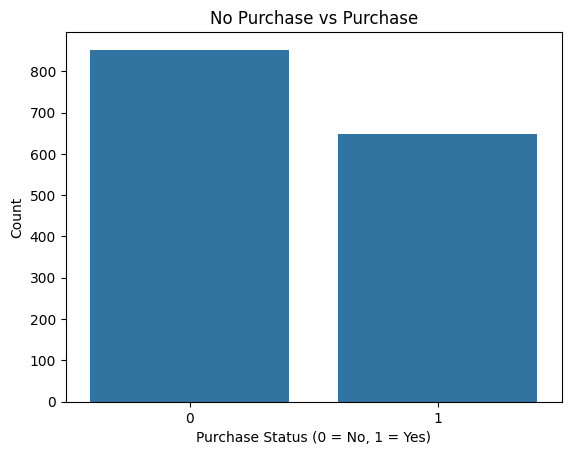

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize purchase behavior: No Purchase (0) vs. Purchase (1)
sns.countplot(x='PurchaseStatus', data=df)
plt.title('No Purchase vs Purchase')
plt.xlabel('Purchase Status (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

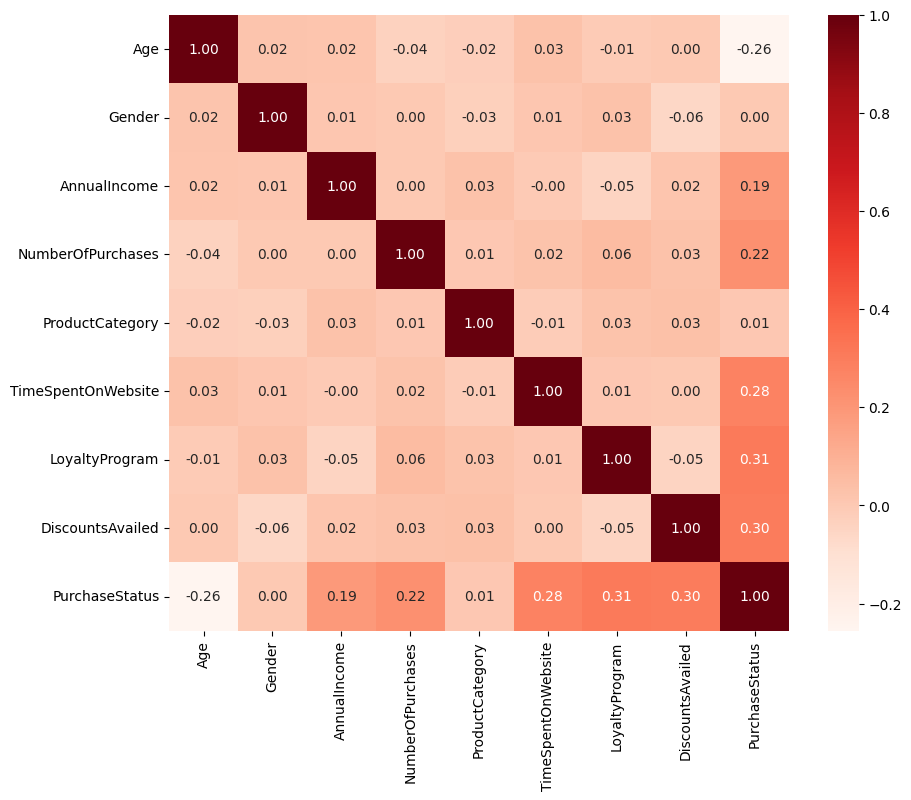

In [80]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="Reds", fmt=".2f")
plt.show

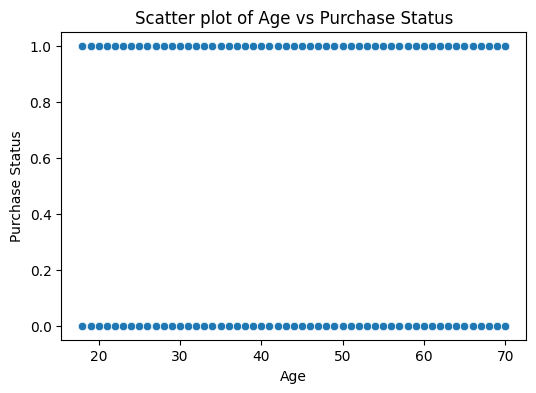

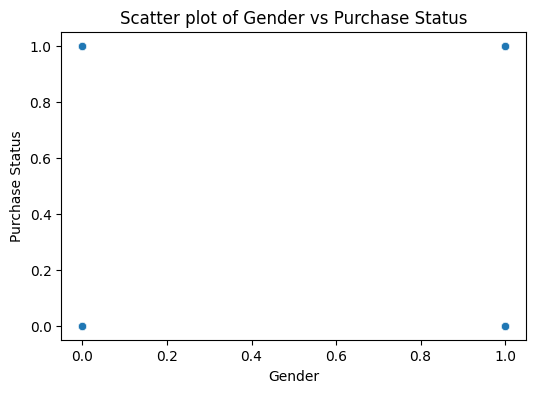

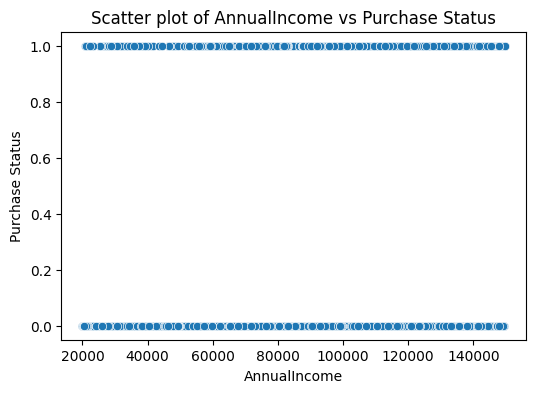

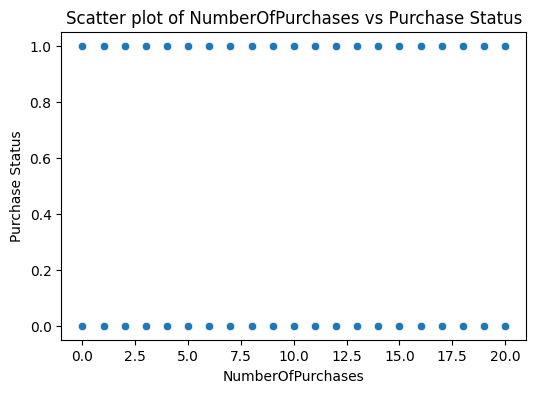

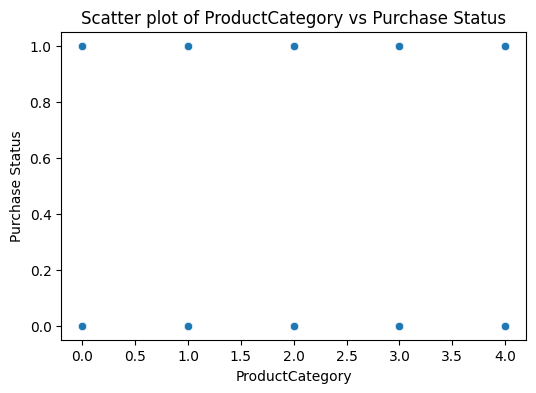

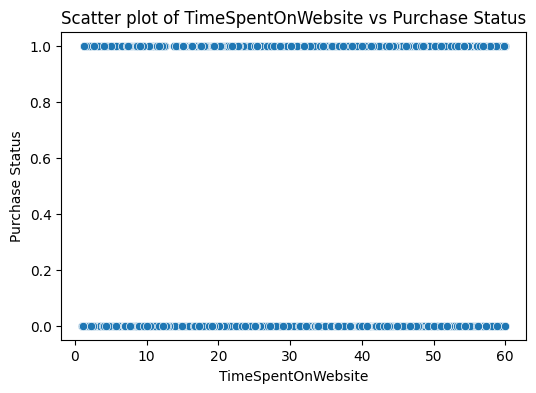

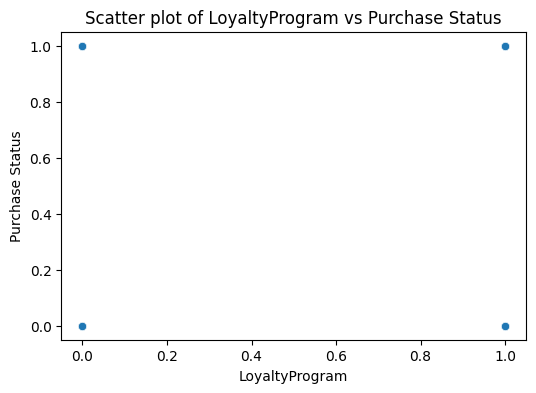

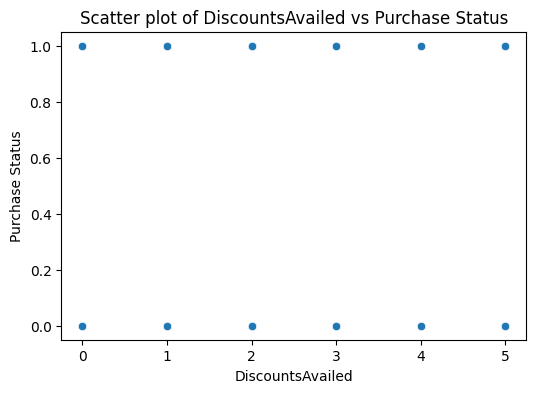

In [84]:

# Create a list of columns to plot (excluding the target variable)
columns_to_plot = X.columns.tolist()

# Loop through each feature and create scatter plots against the target variable (PurchaseStatus)
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))  # Adjust figure size for better visibility
    sns.scatterplot(x=df[column], y=df['PurchaseStatus'])  # Scatter plot
    plt.title(f'Scatter plot of {column} vs Purchase Status')  # Title
    plt.xlabel(column)  # X-axis label
    plt.ylabel('Purchase Status')  # Y-axis label
    plt.show()  # Display the plot


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
X = df.drop(columns=['PurchaseStatus'])
y = df['PurchaseStatus']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [61]:
# Define the vanilla model
model = Sequential()

#input layer
model.add(Dense(64, activation= 'relu', input_shape=(X_train.shape[1],)))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Output layer (for binary classification)
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Loss: {test_loss}")
print(f"Accuracy: {test_accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6145 - loss: 0.6759 - val_accuracy: 0.7500 - val_loss: 0.6143
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.6076 - val_accuracy: 0.7917 - val_loss: 0.5502
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7534 - loss: 0.5524 - val_accuracy: 0.7833 - val_loss: 0.5049
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7849 - loss: 0.5090 - val_accuracy: 0.7917 - val_loss: 0.4631
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8028 - loss: 0.4630 - val_accuracy: 0.7875 - val_loss: 0.4430
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7973 - loss: 0.4519 - val_accuracy: 0.8083 - val_loss: 0.4305
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8416 - loss: 0.4141 - val_accuracy: 0.7958 - val_loss: 0.4274
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4240 - val_accuracy: 0.8208 - v

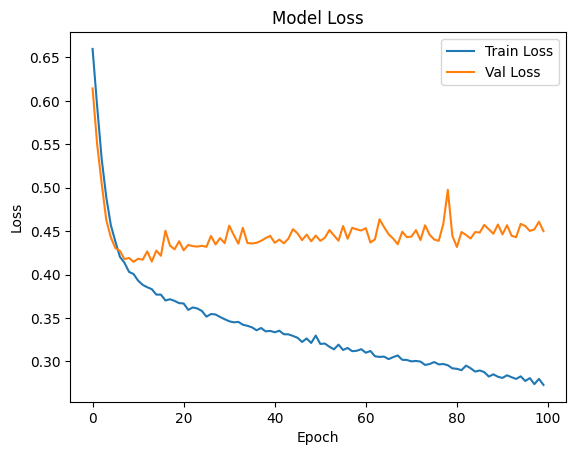

In [62]:
# Plot Training and validation loss values
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(loc="upper right")
plt.show()

In [86]:
# L2 Regularized Model
model2 = Sequential()

# Input Layer
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Hidden Layers
model2.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

model2.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model2.add(Dropout(0.2))

# Output Layer
model2.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer and binary cross-entropy loss
model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model2
model2_history= model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[early_stopping], verbose=2)

# Evaluate model2
model_loss, model_accuracy = model2.evaluate(X_test, y_test)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
27/27 - 2s - 70ms/step - accuracy: 0.5976 - loss: 0.6764 - val_accuracy: 0.7619 - val_loss: 0.5852
Epoch 2/100
27/27 - 0s - 4ms/step - accuracy: 0.7405 - loss: 0.5719 - val_accuracy: 0.7952 - val_loss: 0.5057
Epoch 3/100
27/27 - 0s - 6ms/step - accuracy: 0.7952 - loss: 0.5008 - val_accuracy: 0.7952 - val_loss: 0.4519
Epoch 4/100
27/27 - 0s - 5ms/step - accuracy: 0.7881 - loss: 0.4674 - val_accuracy: 0.7905 - val_loss: 0.4332
Epoch 5/100
27/27 - 0s - 5ms/step - accuracy: 0.8167 - loss: 0.4471 - val_accuracy: 0.8000 - val_loss: 0.4176
Epoch 6/100
27/27 - 0s - 4ms/step - accuracy: 0.8167 - loss: 0.4182 - val_accuracy: 0.8095 - val_loss: 0.4151
Epoch 7/100
27/27 - 0s - 6ms/step - accuracy: 0.8417 - loss: 0.3997 - val_accuracy: 0.8000 - val_loss: 0.4218
Epoch 8/100
27/27 - 0s - 4ms/step - accuracy: 0.8250 - loss: 0.4037 - val_accuracy: 0.8095 - val_loss: 0.4115
Epoch 9/100
27/27 - 0s - 4ms/step - accuracy: 0.8369 - loss: 0.3905 - val_accuracy: 0.8048 - val_loss: 0.4091
Epoch 10/

In [76]:
# Check for missing values
df.isnull().sum()

# Extract features and target with adjusted column names
X = df[['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
         'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed']]
y = df['PurchaseStatus']

# Split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
